Data Preparation

Download the historial daily data of the entire 2018 for the 6 stocks

tks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk. https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 5 stocks.

You should have 6 csv files on your disk now. IBM.csv, MSFT.csv, etc. Each of the csv file should look like below (Your actual numbers may be different from below)

image.png
Retrieve the "Adj Close" column values as the daily prices of each stock

Please read the csv file, and retrieve the "Adj Close" column values and store them into Numpy 2D array. Conceptually the array has one dimension representing the 6 stocks and another dimension representing the price sequence of 2018.

In [36]:
# data preparation

import pandas as pd

company_names = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']
price_sequences = []

# as i see, data provided link is redirecting to 2022 - 2023 time range

for data in company_names:
    file_path = f"C://Users//srikr//Downloads//{data}.csv"
    df_list = pd.read_csv(file_path)
    adj_close = df_list['Adj Close'].values
    price_sequences.append(adj_close)

for i, company in enumerate(company_names):
    print(f'{company} Adj Close prices:')
    print(price_sequences[i])

IBM Adj Close prices:
[121.597435 122.321053 123.006592 124.40625  121.159439 121.578392
 119.483688 121.17849  121.616478 120.254929 118.950493 119.312309
 116.836754 116.170258 115.913177 116.884354 115.808434 113.123413
 115.694191 119.493217 119.721725 116.379723 113.132935 112.114151
 112.161758 111.942757 115.960785 114.29454  115.703697 117.055733
 116.646317 122.159195 123.682602 126.339081 126.567596 128.548035
 128.319534 131.880493 131.671036 131.585342 130.28093  128.033875
 130.404709 131.718643 133.337296 132.373779 136.073593 137.942764
 138.935165 139.070053 139.243469 140.756149 142.249557 141.324615
 143.65625  143.319046 142.952911 140.84285  141.141556 143.463547
 143.714081 143.241959 142.027954 142.114685 141.893082 142.384445
 141.681122 143.762238 145.072586 144.388504 137.162338 135.042664
 133.799759 136.12178  136.950378 135.736374 136.478256 137.220139
 134.907776 135.90979  135.746002 136.381912 137.39357  135.957977
 138.453415 138.308899 139.51326  139.95

In [3]:
import numpy as np

stock_data = np.array(price_sequences)
stock_data

array([[121.597435, 122.321053, 123.006592, ..., 148.130005, 148.059998,
        147.520004],
       [256.046387, 261.929535, 264.098602, ..., 332.880005, 329.910004,
        334.269989],
       [109.419998, 111.779999, 111.870003, ..., 135.369995, 136.199997,
        137.199997],
       [153.549088, 156.441925, 162.466171, ..., 182.910004, 177.559998,
        178.179993],
       [129.820007, 133.270004, 136.449997, ..., 135.360001, 137.850006,
        138.229996],
       [162.059998, 169.149994, 168.960007, ..., 299.170013, 298.670013,
        297.890015]])

In [4]:
stock_data.shape

# shape of the matrix is perfect, no need to perform data cleaning
# 6 is representing the company 
# 252 is representing extracted price sequence data of 2022 - 2023 from the link

(6, 252)

Plot the daily price curve for each stock. So you will have 6 plots.

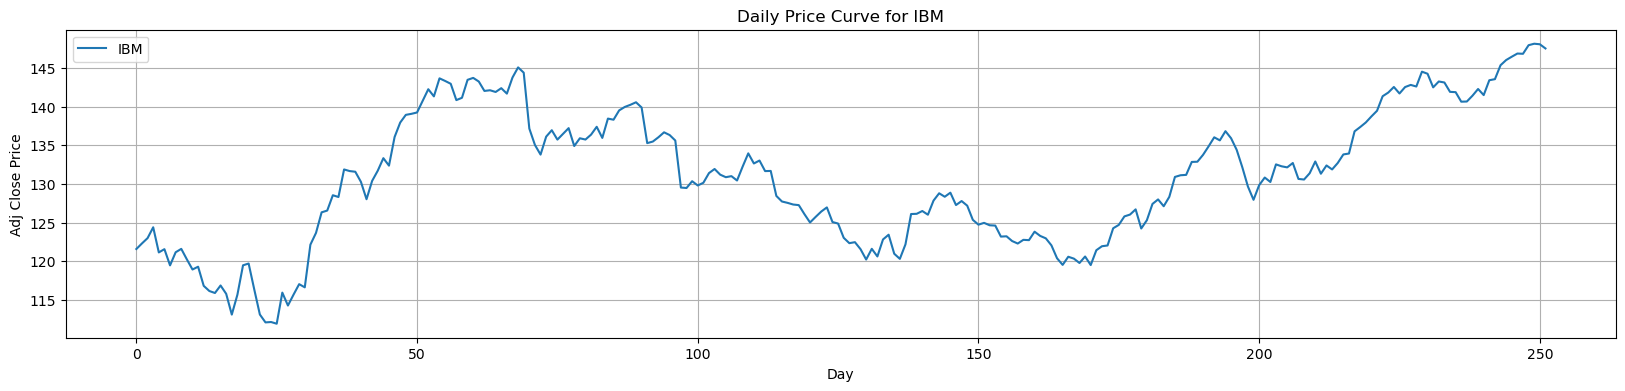

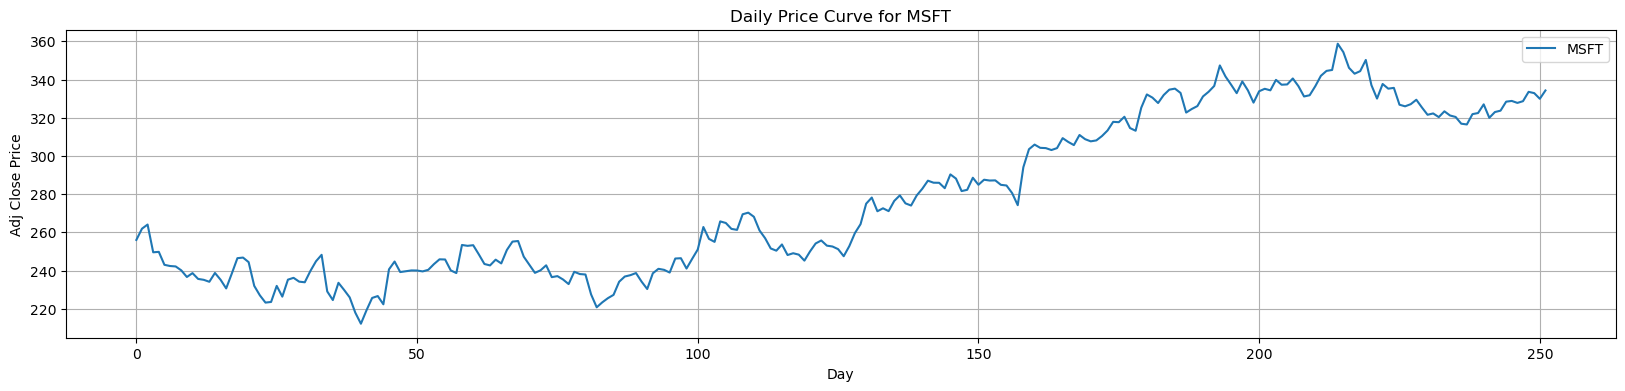

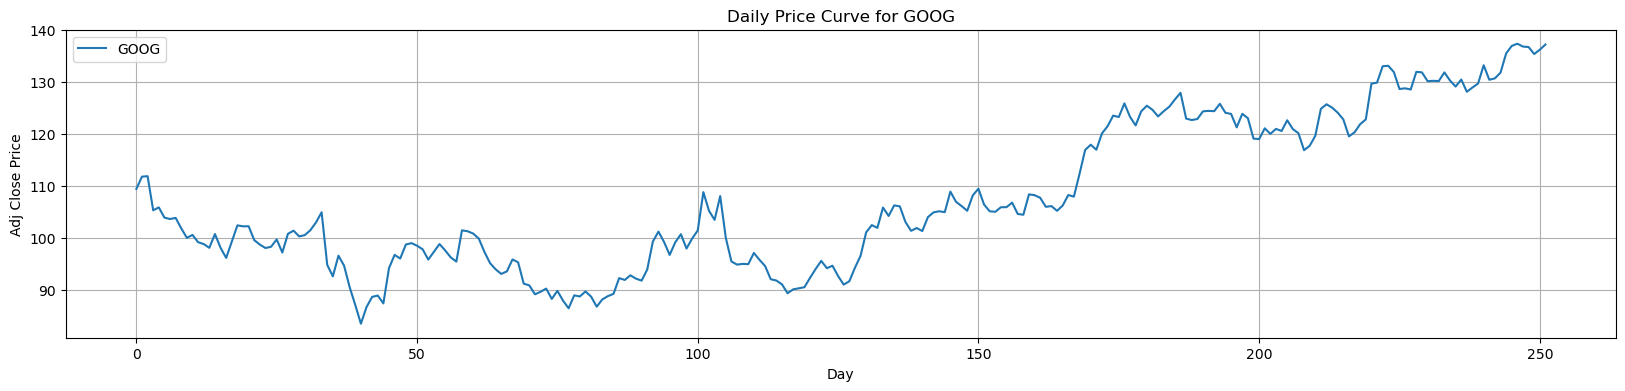

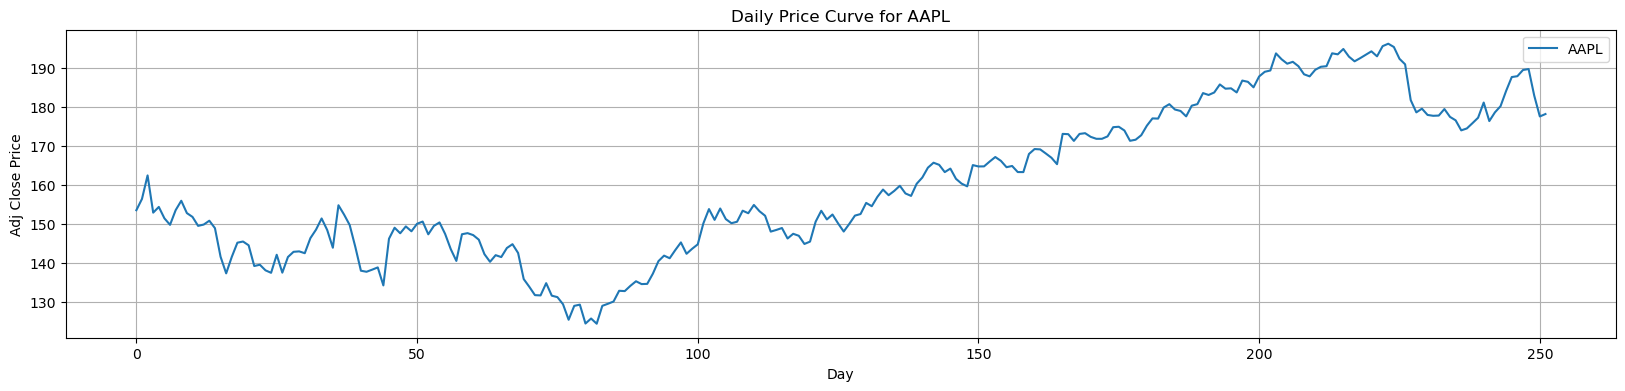

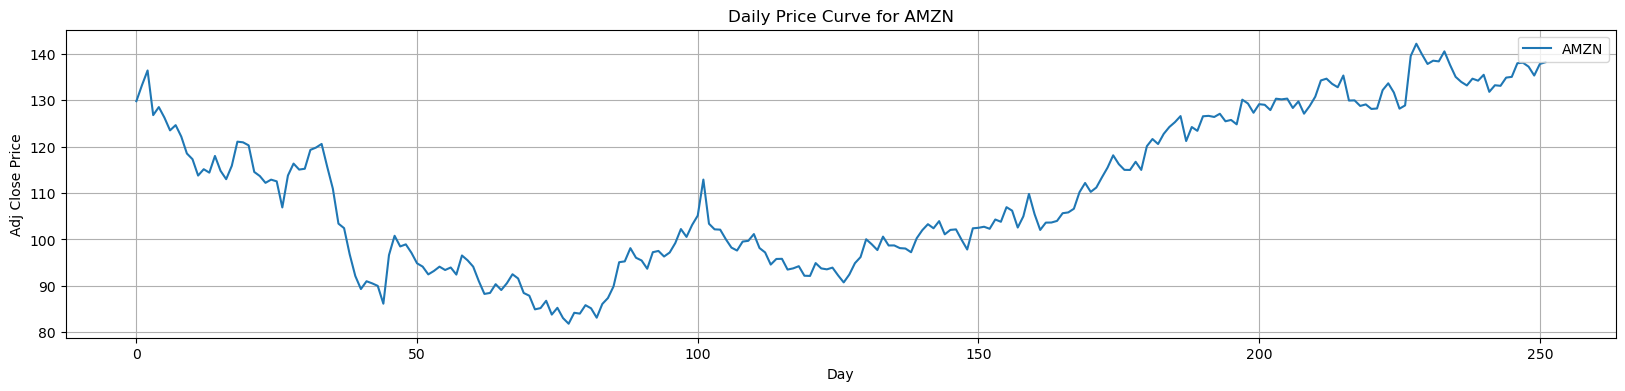

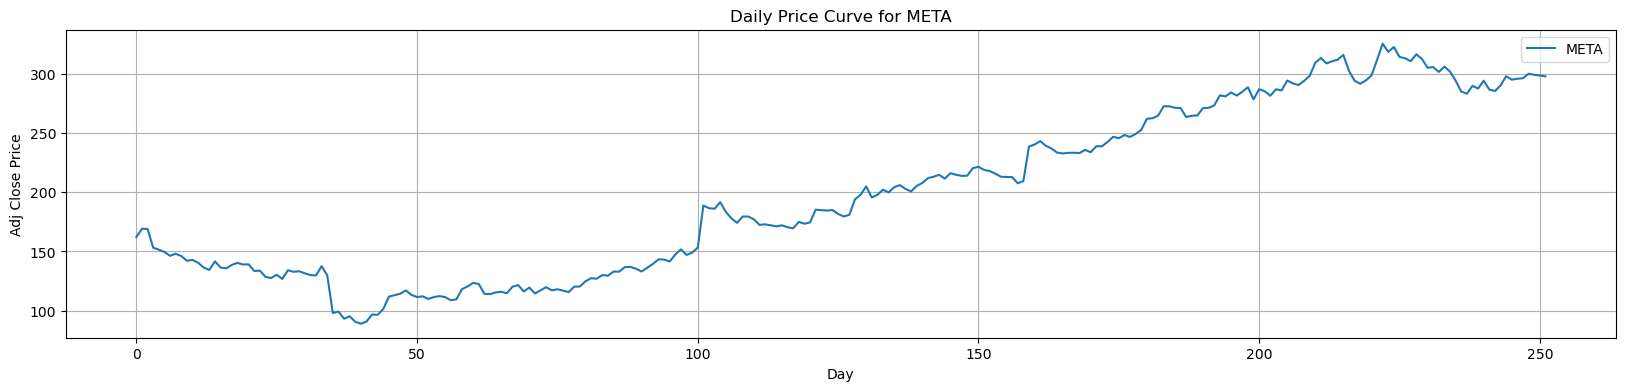

In [5]:
# Plotting

import matplotlib.pyplot as plt

for i, company in enumerate(company_names):
    plt.figure(figsize=(20, 4))  
    plt.plot(stock_data[i], label=company)
    plt.xlabel('Day')
    plt.ylabel('Adj Close Price')
    plt.title(f'Daily Price Curve for {company}')
    plt.legend()
    plt.grid(True)

plt.show()

Compute the correlation between any two stocks.

Requirements: Please do NOT use any library API to compute correlation. You should use the above formula to implement the correlation algorithm using Numpy. You should not use any type of loops in this function.

Find the two most correlated stocks.
The sample correlation coefficient formula is Σ(xi−¯x)(yi−¯y)/√Σ(xi−¯x)2∑(yi−¯y)2

where 𝑥 and 𝑦 are the sample means of [𝑥1,𝑥2,...,𝑥𝑛] and [𝑦1,𝑦2,...,𝑦𝑛]

In [14]:
IBM = np.array(stock_data[0])
MSFT = np.array(stock_data[1])
GOOG = np.array(stock_data[2])
AAPL = np.array(stock_data[3])
AMZN = np.array(stock_data[4])
META = np.array(stock_data[5])


In [16]:
stock_data_matrix = np.vstack((IBM, MSFT, GOOG, AAPL, AMZN, META))
stock_data_matrix

array([[121.597435, 122.321053, 123.006592, ..., 148.130005, 148.059998,
        147.520004],
       [256.046387, 261.929535, 264.098602, ..., 332.880005, 329.910004,
        334.269989],
       [109.419998, 111.779999, 111.870003, ..., 135.369995, 136.199997,
        137.199997],
       [153.549088, 156.441925, 162.466171, ..., 182.910004, 177.559998,
        178.179993],
       [129.820007, 133.270004, 136.449997, ..., 135.360001, 137.850006,
        138.229996],
       [162.059998, 169.149994, 168.960007, ..., 299.170013, 298.670013,
        297.890015]])

In [17]:
mean_stocks = np.mean(stock_data_matrix, axis=1)
print(mean_stocks)

diff_stocks = stock_data_matrix - mean_stocks[:, np.newaxis]
print(diff_stocks)

numerator = np.dot(diff_stocks, diff_stocks.T)
print(numerator)

[130.90498066 278.42513167 107.51878984 160.14568647 110.27714319
 199.2542462 ]
[[ -9.30754566  -8.58392766  -7.89838866 ...  17.22502434  17.15501734
   16.61502334]
 [-22.37874467 -16.49559667 -14.32652967 ...  54.45487333  51.48487233
   55.84485733]
 [  1.90120816   4.26120916   4.35121316 ...  27.85120516  28.68120716
   29.68120716]
 [ -6.59659847  -3.70376147   2.32048453 ...  22.76431753  17.41431153
   18.03430653]
 [ 19.54286381  22.99286081  26.17285381 ...  25.08285781  27.57286281
   27.95285281]
 [-37.1942482  -30.1042522  -30.2942392  ...  99.9157668   99.4157668
   98.6357688 ]]
[[  19093.44616378   21738.81296553    8923.34926425    7538.93310569
     3378.55880378   32166.74573558]
 [  21738.81296553  423827.91236346  135643.42634302  189429.24235327
   126533.37200286  706573.24439752]
 [   8923.34926425  135643.42634302   52174.88494907   62862.71269426
    53009.39263164  233329.40405004]
 [   7538.93310569  189429.24235327   62862.71269426   91739.45401464
    63

In [19]:
denom_stocks = np.sqrt(np.sum(diff_stocks**2, axis=1))
print(denom_stocks)

denom_stocks[denom_stocks == 0] = 1.0

[ 138.17903663  651.02066969  228.41822377  302.88521591  261.82401639
 1121.07825289]


In [22]:
correlation_matrix = numerator / (denom_stocks[:, np.newaxis] * denom_stocks[np.newaxis, :])
correlation_matrix

array([[1.        , 0.24165673, 0.28271899, 0.1801315 , 0.09338558,
        0.20764861],
       [0.24165673, 1.        , 0.91216462, 0.96066987, 0.74233651,
        0.96811396],
       [0.28271899, 0.91216462, 1.        , 0.90862419, 0.886365  ,
        0.91117709],
       [0.1801315 , 0.96066987, 0.90862419, 1.        , 0.80215278,
        0.9423967 ],
       [0.09338558, 0.74233651, 0.886365  , 0.80215278, 1.        ,
        0.7718306 ],
       [0.20764861, 0.96811396, 0.91117709, 0.9423967 , 0.7718306 ,
        1.        ]])

In [27]:
np.fill_diagonal(correlation_matrix, -2)

indices = np.triu_indices(len(stock_names), k=1)
print(indices)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]))


In [34]:
indices = np.triu_indices(len(stock_names), k=1)
correlations = correlation_matrix[indices]
pairs = [(stock_names[i], stock_names[j]) for i, j in zip(indices[0], indices[1])]
for pair, corr in zip(pairs, correlations):
    print(f"Correlation coefficient for {pair[0]}:{pair[1]}: {corr}")

Correlation coefficient for IBM:MSFT: 0.24165672639989952
Correlation coefficient for IBM:GOOG: 0.28271899039753895
Correlation coefficient for IBM:AAPL: 0.18013149510138327
Correlation coefficient for IBM:AMZN: 0.09338558442960117
Correlation coefficient for IBM:META: 0.20764861446439306
Correlation coefficient for MSFT:GOOG: 0.9121646213618226
Correlation coefficient for MSFT:AAPL: 0.9606698684455995
Correlation coefficient for MSFT:AMZN: 0.7423365148048725
Correlation coefficient for MSFT:META: 0.9681139599416507
Correlation coefficient for GOOG:AAPL: 0.9086241852975568
Correlation coefficient for GOOG:AMZN: 0.8863649976033352
Correlation coefficient for GOOG:META: 0.9111770944489761
Correlation coefficient for AAPL:AMZN: 0.8021527814381108
Correlation coefficient for AAPL:META: 0.9423967049704092
Correlation coefficient for AMZN:META: 0.7718306036525172


In [29]:
correlations = correlation_matrix[indices]
pairs = [(stock_names[i], stock_names[j]) for i, j in zip(indices[0], indices[1])]
print(pairs)

[('IBM', 'MSFT'), ('IBM', 'GOOG'), ('IBM', 'AAPL'), ('IBM', 'AMZN'), ('IBM', 'META'), ('MSFT', 'GOOG'), ('MSFT', 'AAPL'), ('MSFT', 'AMZN'), ('MSFT', 'META'), ('GOOG', 'AAPL'), ('GOOG', 'AMZN'), ('GOOG', 'META'), ('AAPL', 'AMZN'), ('AAPL', 'META'), ('AMZN', 'META')]


In [32]:
sorted_pairs = [pair for _, pair in sorted(zip(correlations, pairs), reverse=True)]
sorted_pairs

[('MSFT', 'META'),
 ('MSFT', 'AAPL'),
 ('AAPL', 'META'),
 ('MSFT', 'GOOG'),
 ('GOOG', 'META'),
 ('GOOG', 'AAPL'),
 ('GOOG', 'AMZN'),
 ('AAPL', 'AMZN'),
 ('AMZN', 'META'),
 ('MSFT', 'AMZN'),
 ('IBM', 'GOOG'),
 ('IBM', 'MSFT'),
 ('IBM', 'META'),
 ('IBM', 'AAPL'),
 ('IBM', 'AMZN')]

In [48]:
print_correlation = lambda pair: print(f"Correlation coefficient for {pair[0]}:{pair[1]} = {correlation_matrix[stock_names.index(pair[0]), stock_names.index(pair[1])]}")

results = list(map(print_correlation, sorted_pairs))

Correlation coefficient for MSFT:META = 0.9681139599416507
Correlation coefficient for MSFT:AAPL = 0.9606698684455995
Correlation coefficient for AAPL:META = 0.9423967049704092
Correlation coefficient for MSFT:GOOG = 0.9121646213618226
Correlation coefficient for GOOG:META = 0.9111770944489761
Correlation coefficient for GOOG:AAPL = 0.9086241852975568
Correlation coefficient for GOOG:AMZN = 0.8863649976033352
Correlation coefficient for AAPL:AMZN = 0.8021527814381108
Correlation coefficient for AMZN:META = 0.7718306036525172
Correlation coefficient for MSFT:AMZN = 0.7423365148048725
Correlation coefficient for IBM:GOOG = 0.28271899039753895
Correlation coefficient for IBM:MSFT = 0.24165672639989952
Correlation coefficient for IBM:META = 0.20764861446439306
Correlation coefficient for IBM:AAPL = 0.18013149510138327
Correlation coefficient for IBM:AMZN = 0.09338558442960117


In [24]:
i, j = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
print(i,j)

0 0


In [25]:
stock_names_i, stock_names_j = stock_names[i], stock_names[j]
correlation = correlation_matrix[i, j]
print(f"Correlation coefficient for {stock_names_i}:{stock_names_j}: {correlation}")

Correlation coefficient for IBM:IBM: 1.0000000000000004


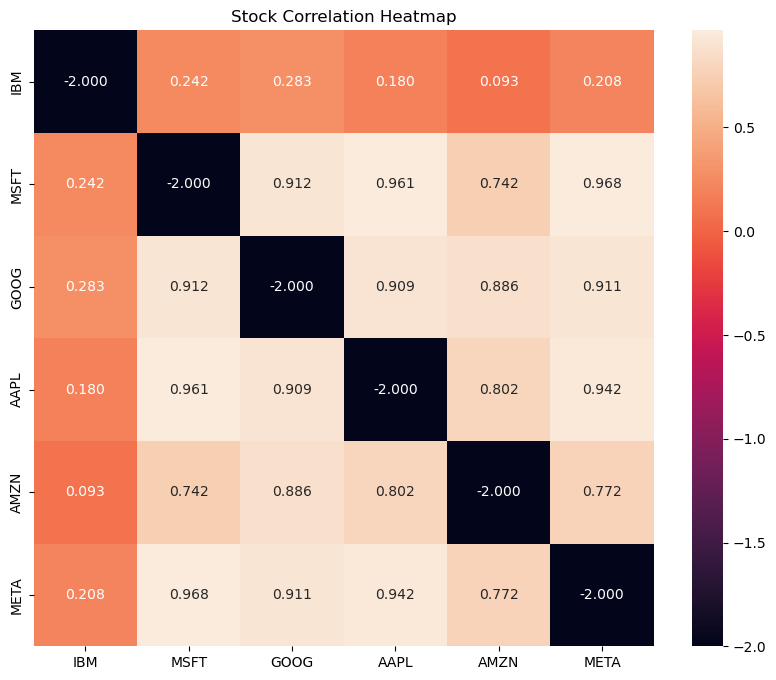

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f",
            xticklabels=stock_names, yticklabels=stock_names)
plt.title('Stock Correlation Heatmap')
plt.show()